# Quantum Helloworld: Superposition and measurement


The goal of this jupyter notebook is to help you write your first quantum program using Qiskit.
This will help you understand its main functionalities:
+ Import qiskit methods
+ Retrieve backend
+ Allocate qubits
+ Apply gates
+ Transpile circuit
+ Submit quantum job
+ Display the results

In this example, we will build a circuit that creates a quantum superposition state and then run the circuit on Finnish quantum computer, Helmi

## First step: Import qiskit methods



The first step towards using Qiskit is to import necessary methods:

+ `QuantumCircuit`: Qiskit object that contains the instructions for quantum computer to execute. (Basically our quantum program)
+ `transpile`: Qiskit method that rewrites a quantum circuit to make it compatible with specific hardware
+ `Aer`: Qiskits' own quantum simulator
+ `IQMProvider`: Used to retrieve client to connect to Helmi quantum computer (control stack)
+ `os`: Used to get environment variable for Helmi when using LUMI-supercomputer

The following cell imports the everything we require in this notebook

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit import Aer
from iqm.qiskit_iqm import IQMProvider
import os

We now have all the tools we need to create the program we want to implement. We want to send send a job to quantum computer, which we runs our quantum circuit.

To clarify:
+ Quantum circuit is our program, which we run on quantum computer
+ Job can consist of one or more quantum circuits

## Second step: Retrieve backend

Backend is what runs our program.

Backend can be:
+ Simulator: Quantum job is simulated on classical computer. Simulator can be ideal, or it can have a noise profile mimicking real quantum device
+ QPU (Quantum Processing unit): Quantum job is run on a real quantum computer

In this notebook, we demonstrate both of these backends.

First we choose is a simulator that performs calculations using statevectors. The following cell retrieves backend for the ideal, noiseless `statevector_simulator` from `Aer`

In [2]:
backend_simulator = Aer.get_backend('statevector_simulator')

To run jobs on real quantum computers, we need a different backend. 

We will use Helmi, the Finnish quantum computer connected to LUMI-supercomputer. Note, that to access Helmi you must be using correct node of LUMI.

Following steps are needed:
+ Get environment variable `HELMI_CORTEX_URL`
+ Initialize `IQMProvider` with Helmi server URL
+ Retrieve backend for Helmi quantum computer

In [3]:
## Helmi Quantum Computer------------------------------
HELMI_CORTEX_URL = os.getenv('HELMI_CORTEX_URL')
provider = IQMProvider(HELMI_CORTEX_URL)
backend_helmi = provider.get_backend()
##-----------------------------------------------------

## Helmi Simulator (BACKUP OPTION)-------------------------------------
#from iqm.qiskit_iqm import IQMFakeAdonis
#backend_helmi = IQMFakeAdonis()
##-----------------------------------------------------

Next, we proceed to write our quantum program, which we run using the backends we just defined.

## Third step: Allocate qubits

Creating a quantum circuit starts by allocating qubits. In our example, we need to allocate only one qubit

We need to:
+ Create `QuantumCircuit` object
+ define the number of qubits and classical bits in our circuit

The following cell allocates (creates) one qubit and one classical bit to our circuit:

In [4]:
qc = QuantumCircuit(1,1)

We can visualize the circuit by calling `draw` method. The `'mpl'` sets the matplotlib style renderer, and `style='clifford'` sets a specific visual style.

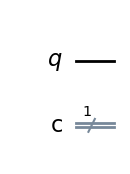

In [5]:
qc.draw('mpl', style='clifford')

## Fourth step: Applying gates

Now, we can have access to our qubit using indices of qubit register.

Registers behave like python list/arrays, for example if your register is named QUBIT_REGISTER:
+ QUBIT_REGISTER[0] is the first qubit.
+ QUBIT_REGISTER[1] is the second qubit.

To create a superposition, we simply need to apply the Hadamard gate to the qubit:

To do so we need to:
+ specify on which circuit we wish to apply our gate
+ specify the gate we wish to apply
+ specify the name of the qubit register we wish to apply the gate (in this case, we didn't name the register as we only have one qubit)
+ specify the index of the qubit inside the register

The following cell applies the Hadamard gate `h` to the first (and in this case only) qubit in the register:

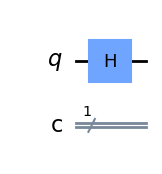

In [6]:
qc.h(0)

# We again draw the circuit to see our gate applied
qc.draw('mpl', style='clifford')

We can also get useful information about the circuit like number of qubits, classical bits and depth (number of circuit layers)

In [7]:
print("Number of qubits: ", qc.num_qubits)
print("Number of classical bits: ", qc.num_clbits)
print("Circuit depth: ", qc.depth())

Number of qubits:  1
Number of classical bits:  1
Circuit depth:  1


## Theory: Statevectors

A brief overview on how our quantum circuit can be represented using quantum mechanical statevectors.
First, we must define two concepts, which are qubits computational basis and quantum gates:
<br><br>

+ Qubits computational basis consists of orthonormal statevectors $|0\rangle$ and $|1\rangle$, which are analogous to the 0 and 1 of classical bits. Orthonormality means, that the inner product satisfies 
$\langle 0|0 \rangle = \langle 1|1 \rangle = 1$, and $\langle 0|1 \rangle = \langle 1|0 \rangle = 0$
+ Any qubit superposition state can be written as a linear combination of the basis states.
+ Quantum logic gates are represented as unitary matrices. Applying quantum gates to qubits can be described using linear algebra

<br><br>
Computational basis states and the Hadamard gate ($H$ gate in our circuit) can be written as:

\begin{equation*}
|0\rangle = 
    \begin{bmatrix}
    1\\
    0
    \end{bmatrix} 
\qquad 
|1\rangle = 
    \begin{bmatrix}
    0\\
    1
    \end{bmatrix} 
\qquad 
H = \frac{1}{\sqrt{2}}
    \begin{bmatrix}
    1 & 1\\
    1 & -1
    \end{bmatrix}  
\end{equation*}
<br><br>

Let's now see what our quantum circuit does. We call the state it creates $|\psi\rangle$. 

If the qubit starts at state $|0\rangle$, applying the Hadamard gate does the following:

\begin{equation*}
|\psi\rangle = H |0\rangle = \frac{1}{\sqrt{2}}
    \begin{bmatrix}
    1 & 1\\
    1 & -1
    \end{bmatrix}
    \begin{bmatrix}
    1\\
    0
    \end{bmatrix} = 
    \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
\end{equation*}


We see that after applying the hadamard gate, the qubit is in a superposition where both computational states have amplitude $1/\sqrt{2} \approx 0.707$

Below we show, how one can calculate the statevector in  Qiskit

*NOTE*: THE FOLLOWING DOES NOT WORK WITH REAL QUANTUM COMPUTER. STATEVECTOR IS ONLY ACCESSIBLE IN SIMULATIONS

To see what the circuit does, we can run it using `backend_simulator` to calculate the statevector for the system

We use `run` method of the backend:
+ Parameter: Circuit you want to run
+ Returns: Job which contains information about the execution of the circuit. In this case we want the statevector

In [8]:
job_simulator = backend_simulator.run(qc)

statevector = job_simulator.result().get_statevector()

# We can display the statevector using LaTex
display(statevector.draw(output='latex'))

<IPython.core.display.Latex object>

Our simulated amplitudes match the ones we explicitly calculated above

In [9]:
print(f"Amplitude of state |0>: {statevector[0]}")
print(f"Amplitude of state |1>: {statevector[1]}")

Amplitude of state |0>: (0.7071067811865476+0j)
Amplitude of state |1>: (0.7071067811865475+0j)


Now what does the amplitude represent? When we measure a quantum system, we observe the system in a certain state with a certain probability. For example, probability to observe our qubit in state $|0\rangle$ is

\begin{equation*}
P_0 = |\langle 0 | \psi \rangle|^2 = \bigg|\frac{1}{\sqrt{2}} \bigg|^2 \big(|\langle 0 | 0 \rangle|^2 + |\langle 0 | 1 \rangle|^2 \big) = \frac{1}{2}
\end{equation*}

That means probability for measuring the state $|0\rangle$ is 50%. In same way, we can calculate the probability for measuring the state $|1\rangle$, which in this case is also 50%.

In the rest of this notebook, we demonstrate this by running our circuit with real quantum computer.

## Fifth step: Add measurement and transpile the circuit

With real QPU, we cannot get the statevector of the system. To get information out of the qubits, we perform measurements.

In this example, we have one qubit we want to measure, so we add measurement instruction to the circuit

We do this by calling `measure`, which takes two arguments:
+ The index of qubit we want to measure
+ The index of classical bit in which we store the result

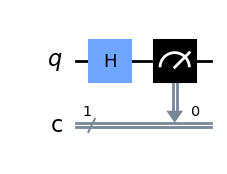

In [10]:
## Let's make a copy of the circuit to not affect the previous cells
qc_measured = qc.copy()

qc_measured.measure(0,0)
qc_measured.draw('mpl', style='clifford')

Before we can run the circuit, we have to do one more thing. Unlike ideal simulator, real QPU has limited qubit connectivity and only has small set of native operations it can execute.
Our circuit has to be mapped to the topology and native gates of the QPU.

To do this, we use `transpile`:
+ Parameters: Circuit to be transpiled and the backend
+ Returns: Circuit with QPU specific instructions

Below we transpile our circuit for Helmi

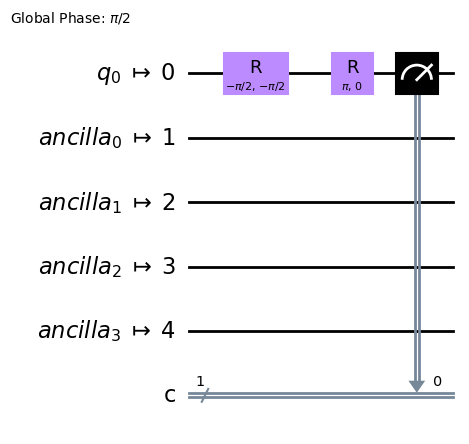

In [11]:
qc_transpiled = transpile(qc_measured, backend_helmi)
qc_transpiled.draw('mpl', style='clifford')

As we see, circuit was mapped to the Helmi 5-qubit QPU. Now that the circuit is transpiled, we can proceed to submit it to the quantum computer.

## Sixth step: Run circuit on QPU

Now it is time to submit our circuit to Helmi. 

Quantum computing is all about probabilities. Because our measurement only yield results in a form of zeros and ones, and each measurement collapses the quantum state, we have to run the circuit multiple times.
We thus specify variable `shots`, which is how many times the quantum circuit is repeated.

To send the job to Helmi, we use `run` method of the `backend_helmi`

In the following cell, we run a job in which circuit is executed on Helmi repeatedly 5 times

In [12]:
shots = 5

job_QPU = backend_helmi.run(qc_transpiled, shots=shots)

When submitting a job to Helmi a unique identifier for your job is returned. This can be used to gather additional information about the circuit you just submitted and the results. **You should save your job ids!**

The status of the job can be queried using `job.status()`. Using the job id, you can retrieve previous jobs.

In [13]:
print(f"Job ID: {job_QPU.job_id()}.")
print(f"Tracking execution of job: {job_QPU.status()}")

Job ID: 3e85fb64-249f-4430-928c-91754ad501f4.
Tracking execution of job: JobStatus.RUNNING


Once the job is completed, we can get the results using `job.result()`

In [14]:
result = job_QPU.result()

## Seventh step: Read out the result

The `result` object is an array containing measurements but also metadata about the experiment. For example:
+ `result.get_counts()`: Returns dictionary of measured states and number of times they were measured
+ `result._get_experiment().shots`: Returns the number of shots

In the following cell, we use these methods to print the results in a nice way. We can get the probability for measurement by dividing the number of counts by the total amount of shots

In [15]:
counts = result.get_counts()
experiment = result._get_experiment()

for sample in counts:
    print(f"Measurement: {sample}, Hits: {counts[sample]}, Probability: {counts[sample]/experiment.shots}")

Measurement: 0, Hits: 3, Probability: 0.6
Measurement: 1, Hits: 2, Probability: 0.4


The probabilities here are not quite 50%. That is because of the low number of shots. Often in quantum computing, much higher number of shots is needed.

Below we see, that by increasing the number of shots, the probabilities approach 50%

In [16]:
result_2 = backend_helmi.run(qc_transpiled, shots=1000).result()

counts_2 = result_2.get_counts()
experiment_2 = result_2._get_experiment()

for sample in counts_2:
    print(f"Measurement: {sample}, Hits: {counts_2[sample]}, Probability: {counts_2[sample]/experiment_2.shots}")

Measurement: 1, Hits: 470, Probability: 0.47
Measurement: 0, Hits: 530, Probability: 0.53


## Real world application: true random numbers

Since the outcomes of quantum system's measurements are **fundamentally random**, they can be utilized in production of truly random numbers (as opposed to quasi-random numbers, whose patterns can be predicted with enough information).   

We review one more example, where we show a neat way of printing 'true random numbers'. 

By default the results of a job are aggregated. This means that if we launch measurements for example 10 times (`shots=10`), repeating outcomes are stored under one label along with the number they repeated (this is how we previously got the probability of each outcome).

It is possible to create a job without aggregating the results by passing the parameter `memory=True`

In [17]:
# Create a job where we specify the number of shots and disable the aggregation of measurement outcomes
result_3 = backend_simulator.run(qc_transpiled, shots=10, memory=True).result()

measurements = result_3.get_memory()

# And use it to print 10 samples
for i, measurement in enumerate(measurements):
    print(f"Shot number: {i}, We measured {measurement}")

Shot number: 0, We measured 1
Shot number: 1, We measured 1
Shot number: 2, We measured 0
Shot number: 3, We measured 0
Shot number: 4, We measured 0
Shot number: 5, We measured 1
Shot number: 6, We measured 0
Shot number: 7, We measured 0
Shot number: 8, We measured 1
Shot number: 9, We measured 1


As you can see, the only information we are getting are the states of each execution.

Let's modify the printing a little to get nice looking random number sequences:

In [18]:
# Include the argument end='' to print the results in one line
for measurement in measurements:
    print(measurement, end='') 

1100010011

## Takeaway

We have seen how to:
+ Import qiskit methods
+ Retrieve backend
+ Allocate qubits
+ Apply gates
+ Represent circuits as statevectors
+ Transpile circuit
+ Submit quantum job
+ Display the results

We only covered here the basics of using Qiskit. For more information, visit Qiskit on IQM user guide https://iqm-finland.github.io/qiskit-on-iqm/user_guide.html